<a href="https://colab.research.google.com/github/namanvirk99/The-Sparks-Foundation-Tasks/blob/main/Predict_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importing libraries required for the task

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

%matplotlib inline

In [20]:
# Reading data from link provided(with the task description)

link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(link)

print("*****Data imported successfully*****")


*****Data imported successfully*****


In [21]:
# Observing the dataset

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [23]:
# To find about the columns and rows in the dataset

data.shape

(25, 2)

In [24]:
# Getting more information from dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [25]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [26]:
# Checking for null values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

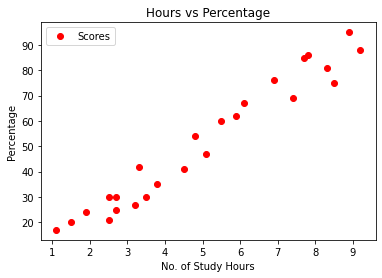

In [27]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Study Hours')  
plt.ylabel('Percentage')  

plt.show()

>From the above graph it can be seen that the relationship between 'number of study hours' and 'percentage' is linear.
So we should proceed with linear regression to predict further.

In [28]:
# Checking correlation between variables

data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [29]:
# Preparing the data 
#divide the data into attributes(inputs) and labels(outputs)

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

print(X)
print(y) 

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [30]:
# spliting the data into training and test sets 
#using Scikit-Learn's in-built train_test_split() method

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0) 

In [31]:
#Training the Algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("***** Training completed *****")


***** Training completed *****


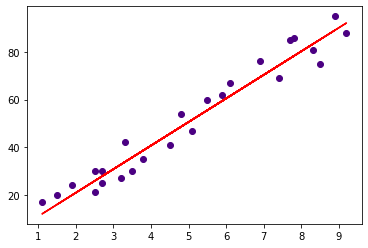

In [32]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, marker='o', color='Indigo')
plt.plot(X, line, color='Red');

plt.show()

In [33]:
# Making Predictions

# Testing data-In Hours

print(X_test) 

# Predicting the scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]


In [34]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


In [35]:
# You can also test with your own data

hours = 9.25
own = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("The predicted score of a person who studies for",hours, "hours is", own[0])

No of Hours = 9.25
The predicted score of a person who studies for 9.25 hours is 92.65537184734602


In [36]:
# Evaluating the Model(using Mean squared error)

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.8945108634106065
